## PCA on movie posters 

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import os
from pylab import imread, imshow
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import imresize
import matplotlib.image as mpimg

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA

In [2]:
############# Read in posters from folder ################

poster_paths = os.listdir('../posters')
num_posters = np.shape(poster_paths)[0]
# function to convert 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
posters = []
ids = []
errors = 0
for poster in poster_paths[:50]:
    img = mpimg.imread('../posters/' + str(poster)) 
    # grayscale image 
    gray = rgb2gray(img)
    try:
        scaled = imresize(gray, (741,500))
        posters.append(np.asarray(scaled))
        ids.append(poster)
    except ValueError:
        errors +=1
        continue
posters_array = np.asarray(posters)
print 'posters shape: ', posters_array.shape
print 'errors: ', errors

posters shape:  (50, 741, 500)
errors:  0


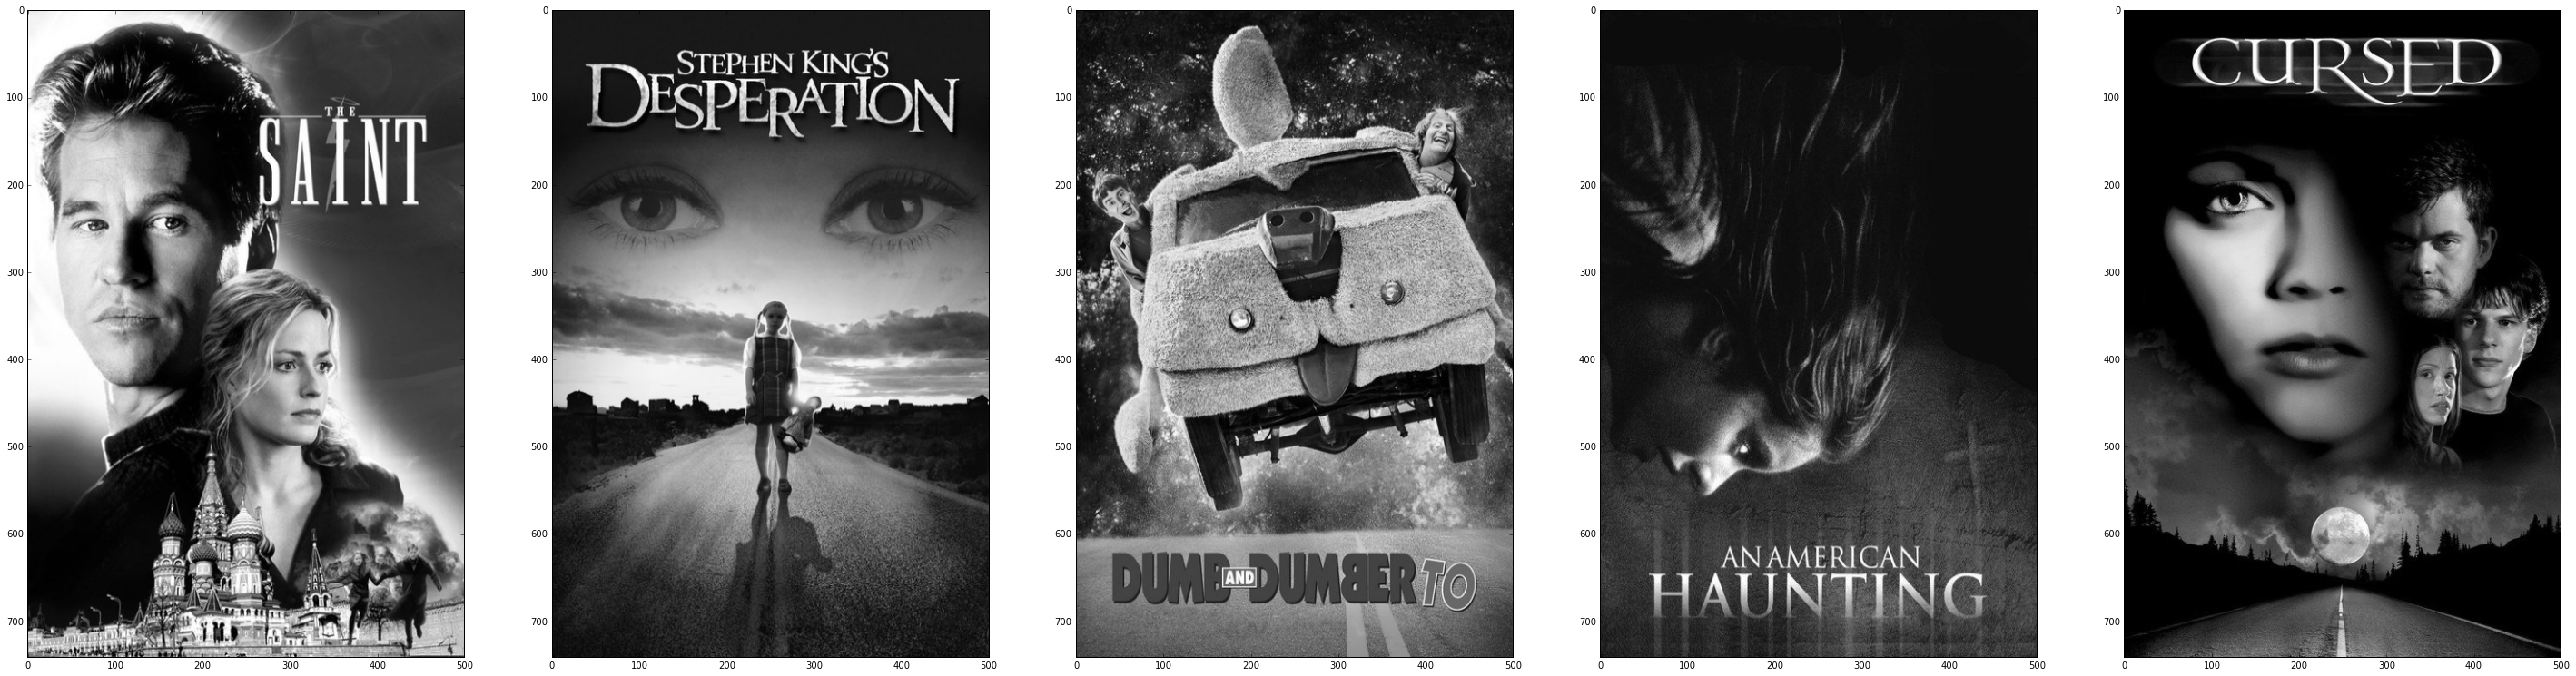

In [3]:
############# Visualise first 5 images ################

plt.figure(figsize=(50,50))
for i in range(1,6):
    plt.subplot(1, 5, i)
    plt.imshow(posters[i], cmap = plt.get_cmap('gray'))

flattened shape, (n_samples, n_features):  (50, 370500)


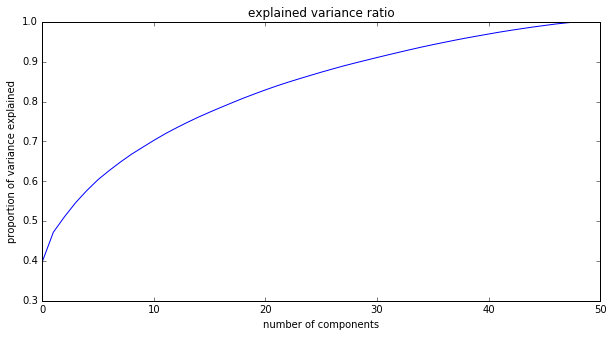

In [4]:
############## flatten pixels into a single vector #############################

posters_flattened = np.array(posters).reshape((posters_array.shape[0], -1))
print 'flattened shape, (n_samples, n_features): ', posters_flattened.shape

################### PCA #####################################

posters_flattened_pca = PCA()
pca = posters_flattened_pca.fit(posters_flattened)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # explained variance ration
plt.xlabel('number of components')
plt.ylabel('proportion of variance explained')
plt.title('explained variance ratio')

In [5]:
#n_components, n_features
#n_components is initialised to the minimum of 
pca.components_.shape

(50, 370500)

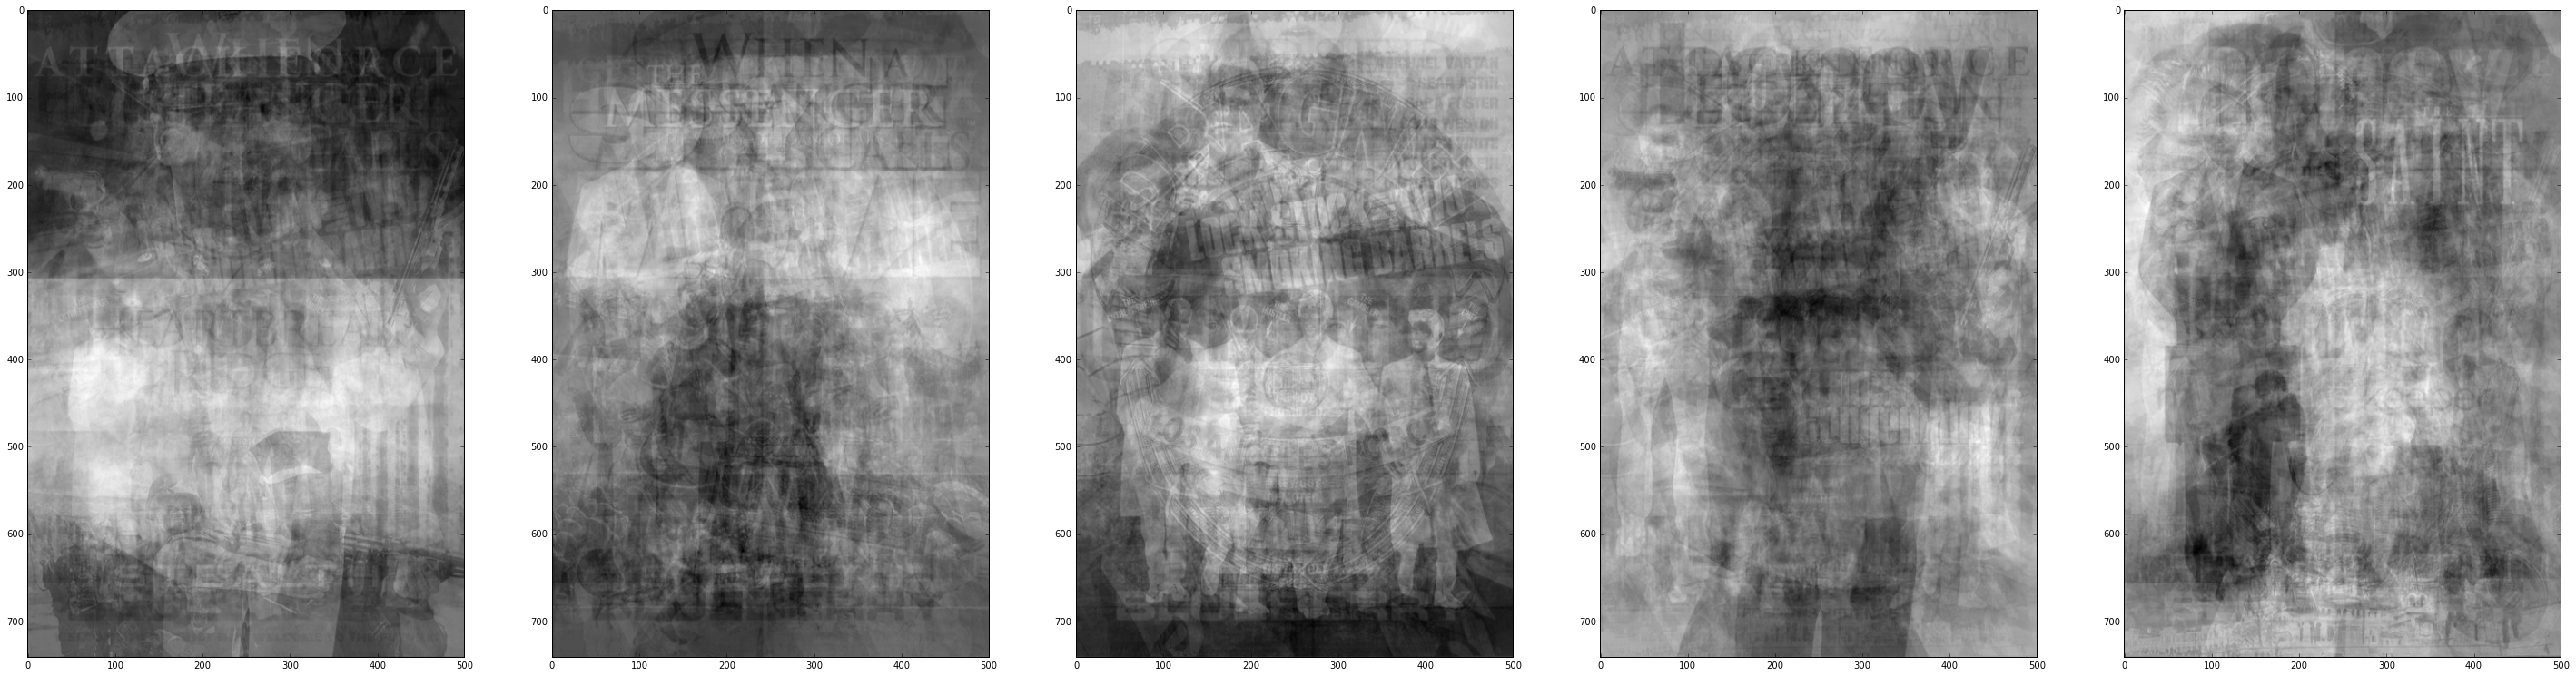

In [6]:
############## TOP 5 principal components ###########################

plt.figure(figsize=(50,50))
for i in range(1,6):
    plt.subplot(1, 5, i)
    plt.imshow(pca.components_[i, :].reshape((741,500)), cmap = plt.get_cmap('gray'))

In [8]:
X_transformed = pca.transform(posters_flattened)

In [12]:
tmdb_ids = map(lambda x: x[:-4], ids) 

In [15]:
tmdb_ids

['100',
 '10003',
 '10004',
 '100042',
 '10008',
 '10012',
 '10013',
 '10014',
 '10015',
 '10016',
 '10017',
 '100183',
 '10019',
 '10022',
 '10023',
 '10024',
 '100241',
 '10025',
 '10027',
 '10028',
 '10029',
 '10030',
 '10032',
 '10040',
 '100416',
 '10045',
 '10046',
 '10047',
 '10048',
 '10049',
 '10050',
 '10052',
 '10053',
 '10054',
 '100544',
 '10057',
 '10060',
 '10061',
 '10063',
 '10064',
 '10066',
 '10067',
 '10068',
 '10069',
 '10070',
 '10071',
 '10072',
 '10073',
 '10074',
 '10075']

In [ ]:
classif = OneVsRestClassifier(SVC(kernel='linear'))
# perform SV classification on each group 
classif.fit(X, Y)

In [ ]:
ids_genres = pd.read